## Ejemplo esperanza de vida frente a renta per cápita por países

In [ ]:
# Conectar google drive

from google.colab import drive
import os

drive.mount('/content/drive')

mi_directorio = '/content/drive/My Drive'

os.chdir(mi_directorio)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Improtamos librerias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargamos arhcivo csv
df = pd.read_csv(r'/content/drive/MyDrive/Universidad /4) MÁSTER EN DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS (UCM)/MÓDULO 2: PROGRAMACIÓN EN PYTHON AVANZADA/datasets/Info_pais.csv',
               encoding='ISO-8859-1', delimiter = ';',decimal=',')
df.head()

,País,Poblacion,Renta per capita,Esperanza de vida
0,United States,325084756,59939,78.9
1,China,1421021791,8612,76.7
2,Japan,127502725,38214,84.5
3,Germany,82658409,44680,81.2
4,India,1338676785,1980,69.4


In [ ]:
# Ahora pondremos los datos en orden descendente según los valores de la columna Población

df_order = df.sort_values('Poblacion', ascending=False)

df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida
1,China,1421021791,8612,76.7
4,India,1338676785,1980,69.4
0,United States,325084756,59939,78.9
15,Indonesia,264650963,3837,71.5
38,Pakistan,207906209,1467,67.1


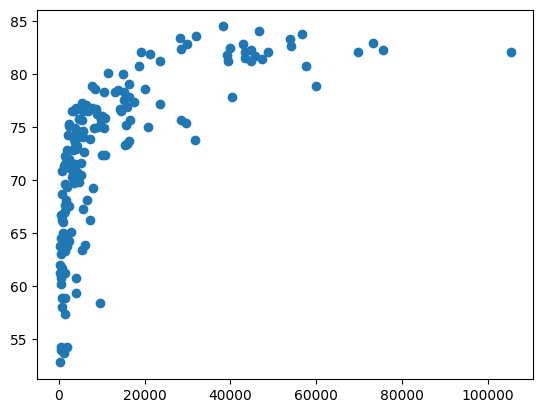

In [ ]:
# Representación gráfica de la renta per cápita en relación a la esperanza de vida

plt.scatter(df_order["Renta per capita"],df_order["Esperanza de vida"])
plt.show()

Text(0, 0.5, 'Esperanza de vida')

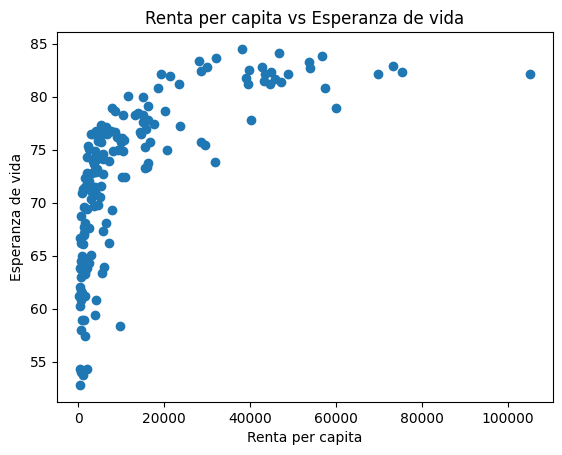

In [ ]:
# Vamos a añadir un título y etiquetas a los ejes x e y del gráfico

plt.scatter(df_order["Renta per capita"],df_order["Esperanza de vida"])

plt.title('Renta per capita vs Esperanza de vida')
plt.xlabel('Renta per capita')
plt.ylabel('Esperanza de vida')

En el gráfico que acabamos de generar los putnos aparecen uniformes. Vamos a configurar el gráfico para que sean proporcionales tanto en el tamaño como en color por cada país. Para ello debemos crear una nueva columna llamada por ejemplo df_order['Población_normalizada'] que normalice frente al máximo de población, por lo que le asignaremos como valores el valor de la columna Población dividido entre el valor máximo de esta columna Población, de este modo lo estaríamos escalando o normalizando  

In [ ]:
# Normalizamos los datos, es decir, en una escala de (0,1), dividiendo entre el número mayor de población
df_order['Poblacion_normalizada'] = df_order['Poblacion']/max(df_order['Poblacion'])
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida,Poblacion_normalizada
1,China,1421021791,8612,76.7,1.000000
4,India,1338676785,1980,69.4,0.942052
0,United States,325084756,59939,78.9,0.228768
15,Indonesia,264650963,3837,71.5,0.186240
38,Pakistan,207906209,1467,67.1,0.146308


In [ ]:
# Vamos a normalizar todavía más los datos, pues el tamaño de las bolas sigue siendo muy desigual
# Para ello, en vez de hacerlo de (0,1), lo hacemos de (0,10000)

df_order['Poblacion_normalizada'] = df_order['Poblacion']/(max(df_order['Poblacion'])/10000)
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida,Poblacion_normalizada
1,China,1421021791,8612,76.7,10000.000000
4,India,1338676785,1980,69.4,9420.522567
0,United States,325084756,59939,78.9,2287.683117
15,Indonesia,264650963,3837,71.5,1862.399047
38,Pakistan,207906209,1467,67.1,1463.075446


Text(0, 0.5, 'Esperanza de vida')

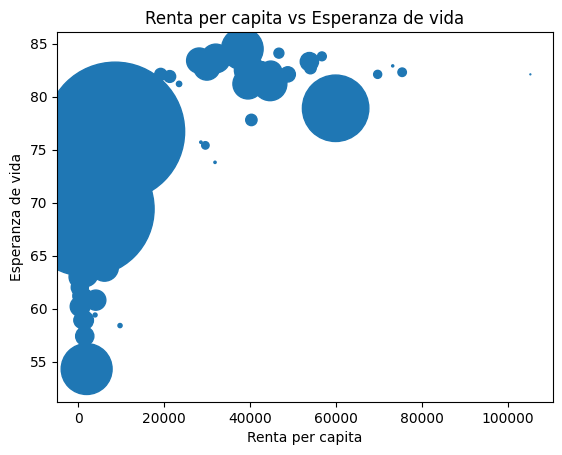

In [ ]:
# Vamos a graficar con los datos normalizados a 10000

plt.scatter(df_order['Renta per capita'],df_order['Esperanza de vida'], s= df_order['Poblacion_normalizada'])

plt.title('Renta per capita vs Esperanza de vida')
plt.xlabel('Renta per capita')
plt.ylabel('Esperanza de vida')

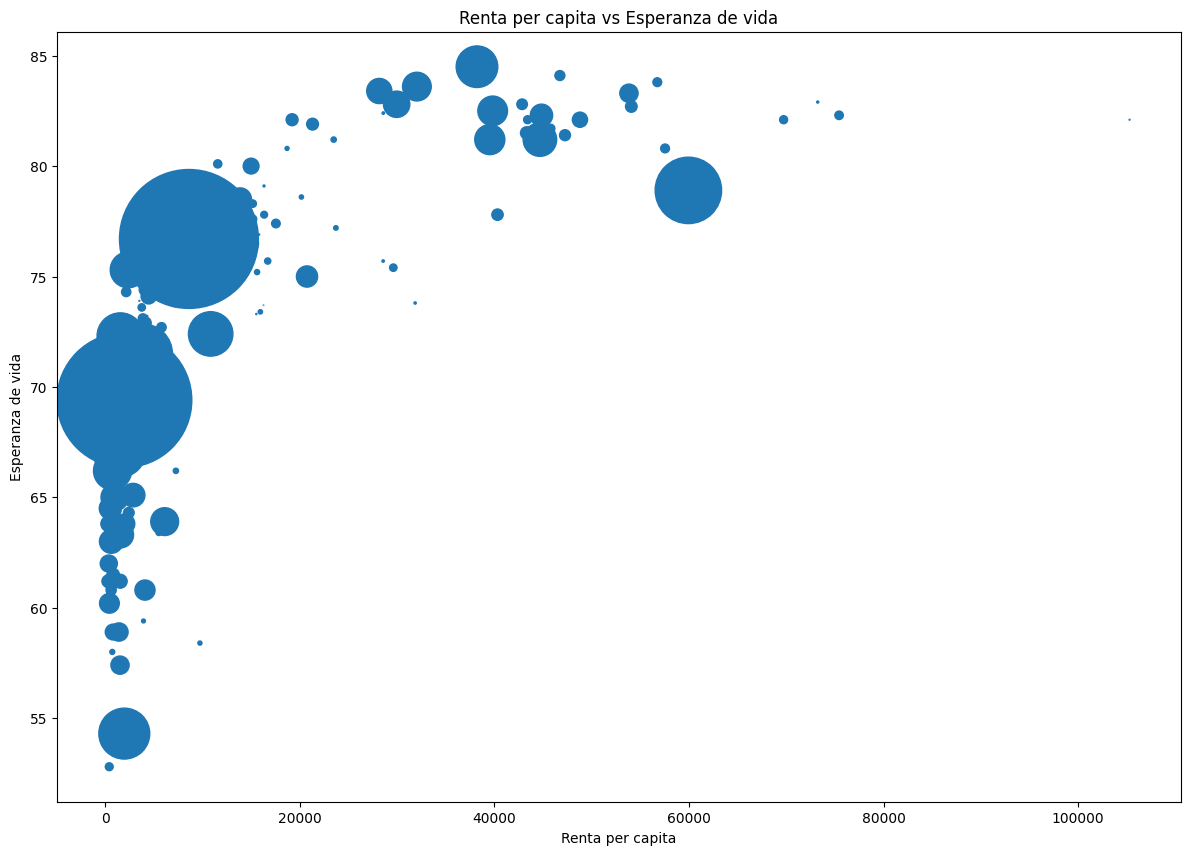

In [ ]:
# Vamos a aumentar las pulgadas de nuestro gráfico, para tener una mejor visualización.
plt.scatter(df_order['Renta per capita'],df_order['Esperanza de vida'], s= df_order['Poblacion_normalizada'])

plt.title('Renta per capita vs Esperanza de vida')
plt.xlabel('Renta per capita')
plt.ylabel('Esperanza de vida')

fig = plt.gcf() #matplotlib y cgf(configuración del gráfico)
fig.set_size_inches(14.5,10) # Metodo para establecer el tamaño de las pulgadas


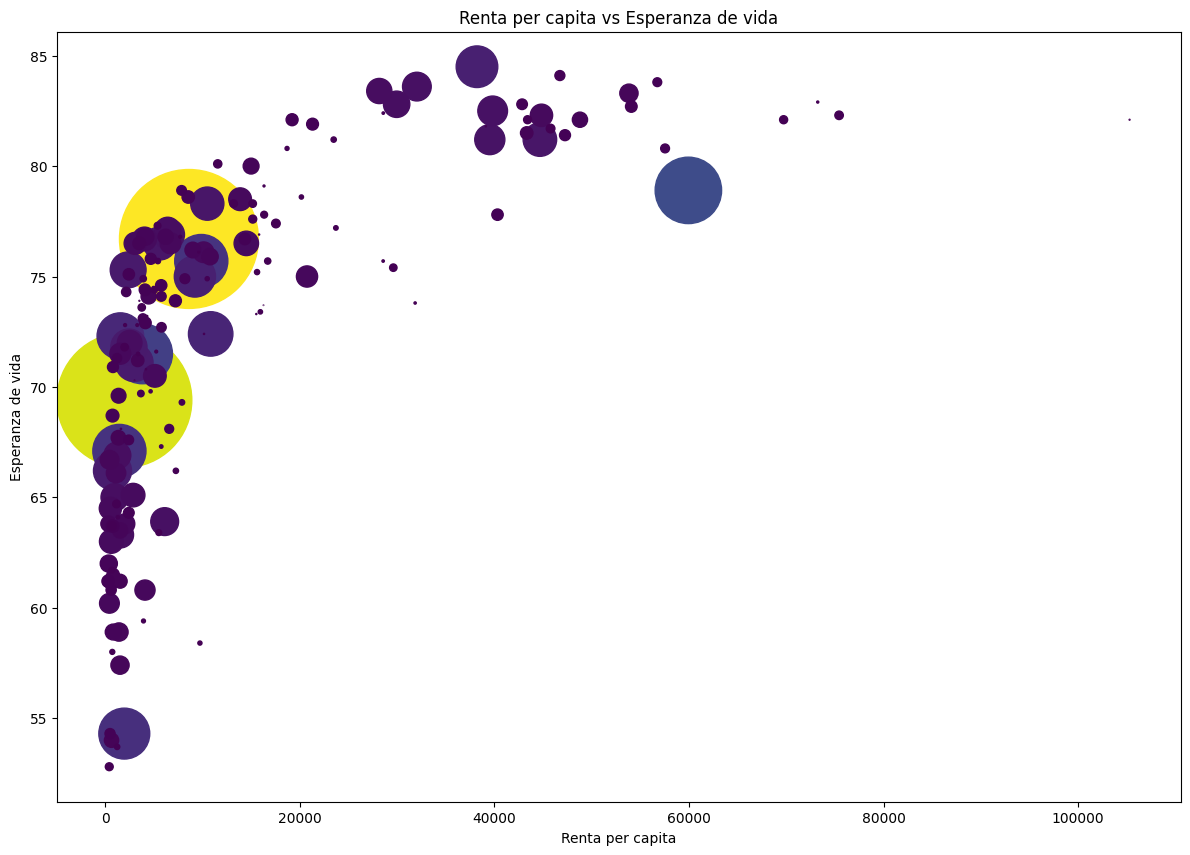

In [ ]:
# Ahora vamos a modificar el color. Para ello debemos añadir c(color), a continuación del atributio s(size)

plt.scatter(df_order['Renta per capita'],df_order['Esperanza de vida'], s= df_order['Poblacion_normalizada'] , c=df_order['Poblacion_normalizada'])

plt.title('Renta per capita vs Esperanza de vida')
plt.xlabel('Renta per capita')
plt.ylabel('Esperanza de vida')

fig = plt.gcf()
fig.set_size_inches(14.5,10)

También podremos aadir la etiqueta del nombre del país dentro de cada burbuja utilizando el método annotate(), por ejemplo añadiendo solo a los 10 primeros países con mayor población, pero antes es necesario arreglar los índices utilizando el método reset_index y pasándole los parámetros drop con valor True y inplace con valor true tambiíen.

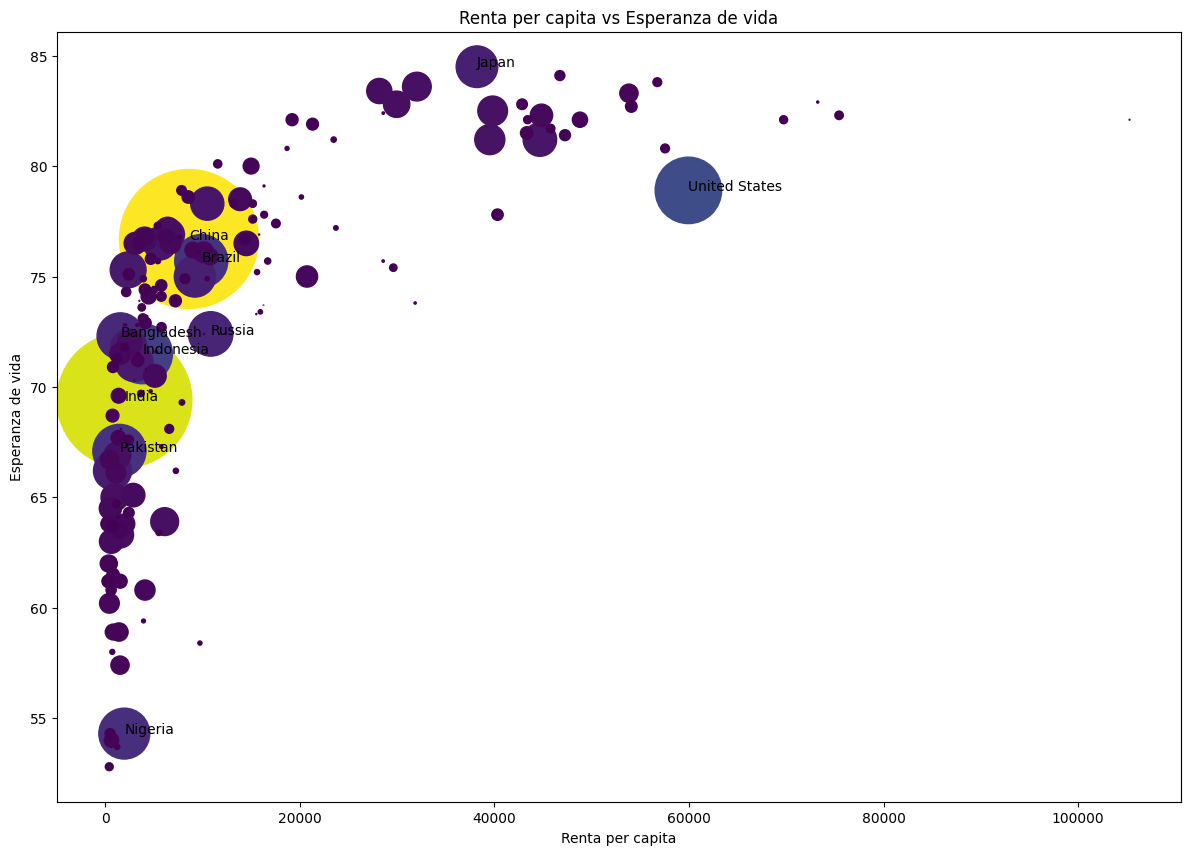

In [ ]:
plt.scatter(df_order['Renta per capita'],df_order['Esperanza de vida'], s= df_order['Poblacion_normalizada'] , c=df_order['Poblacion_normalizada'])

plt.title('Renta per capita vs Esperanza de vida')
plt.xlabel('Renta per capita')
plt.ylabel('Esperanza de vida')

fig = plt.gcf()
fig.set_size_inches(14.5,10)

df_order.reset_index(drop=True,inplace=True) # Necesario para ordenar los países en función de la población
# drop=Ture para reestructurar el indice inicial
# inplace = True es para que se sustituya

for i in range(0,10):
  plt.annotate(df_order['País'][i], # Que quieres que ponga
   (
      df_order['Renta per capita'][i] ,
      df_order['Esperanza de vida'][i]) # Localizame dentro del gráfico en función de los dos ejes
) # Bucle para imprimir en los graficos los nombres de los primeros 10 países.



Podemos añadir en la generación del scatter una propiedad llamada alhpa con valor 0.5 para añadir transaprencia a los círculos, así podremos ver los datos que se puedan ocultar a sobreponerse unos encima de otros. Tambíen añadimos mediante plt.colorbar() una barra lateral que indica la escala de colores y qué valores representa.

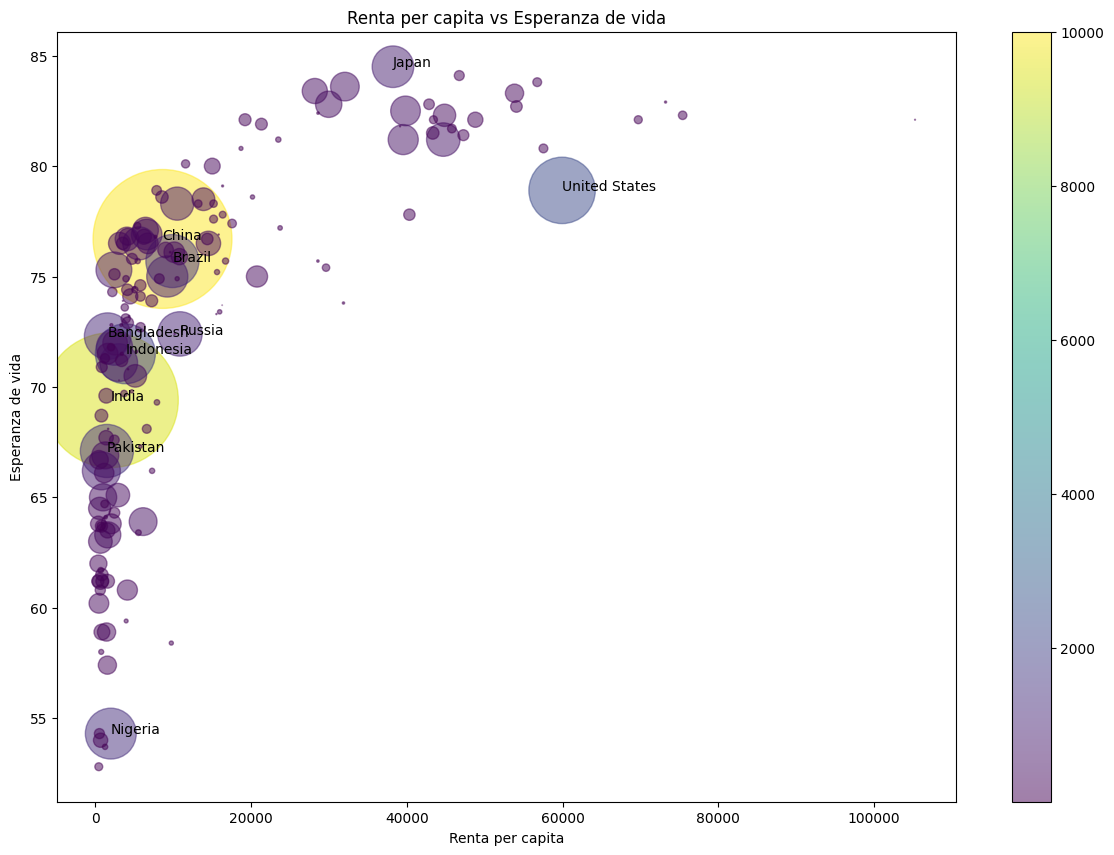

In [ ]:
plt.scatter(df_order['Renta per capita'],df_order['Esperanza de vida'], s= df_order['Poblacion_normalizada'] , c=df_order['Poblacion_normalizada'], alpha=0.5)

plt.title('Renta per capita vs Esperanza de vida')
plt.xlabel('Renta per capita')
plt.ylabel('Esperanza de vida')
plt.colorbar()

fig = plt.gcf()
fig.set_size_inches(14.5,10)

df_order.reset_index(drop=True,inplace=True)

for i in range(0,10):
  plt.annotate(df_order['País'][i],
   (
      df_order['Renta per capita'][i] ,
      df_order['Esperanza de vida'][i]) )

